## Assignment for Week 7 - Performance Evaluations

### Project:
#### Performance Evaluations: ROC Curves

Bank Marketing data:  https://archive.ics.uci.edu/ml/datasets/bank+marketing. Use the bank-additional-full.csv.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

From the given data set, complete the following:
  * Try 3 different types of models to make classification predictions on the bank marketing dataset 
  * Calculate the AUC score as a comparison, and at least 2 other metrics (ie: accuracy, F1 score, precision, recall, etc) 
      - Compare the models’ performance on the same train/test splits 
  * Plot the ROC curve from the best model, choose what you think the best threshold value is for making predictions

### Deliverables:

Upload your notebook's .ipynb file and pdf printouts.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

    Importing required packages for handling data, plotting, modeling, and metrics. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix,accuracy_score, classification_report, roc_auc_score, roc_curve
    
import warnings
warnings.filterwarnings("ignore")

    Loading Bank data

In [2]:
bank = pd.read_csv("bank-additional-full.csv", sep = ';')

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Data Cleaning

    In dataset documents missing values are labeled as "unknown". 
    
    I'm going to convert categorical data into numeric to fit classification models. 
    For "unknown" values, I am going to replace it with -9, so I can convert them again to NA and handle them properly  

In [6]:
bank['job'] = bank['job'].replace({'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,'self-employed':6,'services':7,'student':8,'technician':9,'unemployed':10,'unknown':-9})
bank['marital'] = bank['marital'].replace({'divorced':0,'married':1,'single':2,'unknown':-9})
bank['default'] = bank['default'].replace({'no': 0, 'yes': 1, 'unknown': -9})
bank['education'] = bank['education'].replace({"basic.4y":0,"basic.6y":1,"basic.9y":2,"high.school":3,"illiterate":3,"professional.course":4,"university.degree":5,"unknown":-9})
bank['housing'] = bank['housing'].replace({'yes':0,'no':1, "unknown":-9})
bank['loan'] = bank['loan'].replace({'yes':0,'no':1,"unknown":-9})
bank['day_of_week'] = bank['day_of_week'].replace({ "mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"unknown":-9})
bank['contact'] = bank['contact'].replace({"unknown":-9,"telephone":1,"cellular":2})
bank['month'] = bank['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12, "unknown":-9})
bank['poutcome'] = bank['poutcome'].replace({"failure":0,"nonexistent":2,"success":1})

bank['y'] = bank['y'].replace({'no':0,'yes':1, "unknown":-9})

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
## -9 value in dataset means Null, we replace -9 with NA to find missing values and deal with them

bank.replace(-9,pd.NA,inplace=True)
bank.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

    The dataset has 41188 rows, and we have missing values in 
    'job' 330
    'marital' 80
    'education' 1731
    'default' 8597
    'housing' 990
    'loan' 990
    'poutcome' 35563
    
    For each column, I going to decide to drop missing values, replace them with mean, median, or mode, depending on the distribution of the data   

In [9]:
bank.job.value_counts()

0     10422
1      9254
9      6743
7      3969
4      2924
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
Name: job, dtype: int64

In [10]:
print('job Median: ',bank['job'].median())
print('job mean: ', round(bank['job'].mean()))
print('job mode: ',bank['job'].mode())

job Median:  2.0
job mean:  4
job mode:  0    0
dtype: object


    By looking on Job distribution, I'm going to replace the missing values with median because the data is skewed. we have 0, 1, and 3 values are most frequent values. 

In [11]:
bank['job'] = bank['job'].fillna(2)

In [12]:
bank.marital.value_counts()

1    24928
2    11568
0     4612
Name: marital, dtype: int64

    For "Marital" column, since we only have 88 missing values, dropping them is the best option.

In [13]:
bank= bank.dropna(subset=['marital'])

In [14]:
bank.education.value_counts()

5    12137
3     9519
2     6037
4     5237
0     4170
1     2286
Name: education, dtype: int64

In [15]:
print('education Median: ',bank['education'].median())
print('educastion mean: ',bank['education'].mean())
print('education mode: ',bank['education'].mode())

education Median:  3.0
educastion mean:  3.162291169451074
education mode:  0    5
dtype: object


    For "education" column, we have 1731 missing values. By looking on the distribution and since there is no difference between mean and median. replacing the missing values with 3, which is the mean and median, is the best option.

In [16]:
bank['education'] = bank['education'].fillna(3)

In [17]:
bank.default.value_counts()

0    32519
1        3
Name: default, dtype: int64

    For default column, we have 8597 missing values, and we only have 3 '1s' and 32588 '0s', so replacing them with 0s is the best option here.

In [18]:
bank['default'] = bank['default'].fillna(0)

In [19]:
bank.housing.value_counts()

0    21541
1    18578
Name: housing, dtype: int64

In [20]:
print('housing Median: ',bank['housing'].median())
print('housing mean: ',bank['housing'].mean())
print('housing mode: ',bank['housing'].mode())

housing Median:  0.0
housing mean:  0.4630723597298038
housing mode:  0    0
dtype: object


    For housing column, rounded mean, median, and mode are 0. so I am going to replace them with 0s

In [21]:
bank['housing'] = bank['housing'].fillna(0)

In [22]:
bank.loan.value_counts()

1    33883
0     6236
Name: loan, dtype: int64

In [23]:
print('loan Median: ',bank['loan'].median())
print('loan mean: ',bank['loan'].mean())
print('loan mode: ',bank['loan'].mode())

loan Median:  1.0
loan mean:  0.8445624267803286
loan mode:  0    1
dtype: object


    Same as default column, Loan column has a lot of 1s. Also, median mean, and mode are 1. so I am going to replace them with 1s.

In [24]:
bank['loan'] = bank['loan'].fillna(1)

In [25]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Modeling 

    Now data is clean and with no missing values.
    
    To classify 'Y', I am going to use KNN, Naive Bayes, Decision tree, and Logistic regression. 
    
    First, split data into 80% train and 20% test
    

In [26]:
cols = bank.columns
target_col = 'y'
feat_cols = [c for c in cols if c != target_col]

# there is nothing magical about the X and y notation here. 
# however, it seems to be a fairly standard notation, so we will use is here
x = bank[feat_cols].values
y = bank[target_col].values

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### KNN model

In [29]:
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)

In [30]:
print(classification_report(y_test, knn_preds))
print('AUC score',roc_auc_score(y_test, knn_preds))
print('Accuracy score',accuracy_score(y_test,knn_preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7324
           1       0.61      0.28      0.39       898

    accuracy                           0.90      8222
   macro avg       0.76      0.63      0.67      8222
weighted avg       0.88      0.90      0.89      8222

AUC score 0.6301610533268298
Accuracy score 0.9016054487959134


    90% accuracy, great. 0.90 average precision, 0.91 average recall. 0.91 F1 score. The model performs very well. let's find the optimal k number.

In [34]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    print(f'Evaluating {k} clusters')
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

Features: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] 
Target: y
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


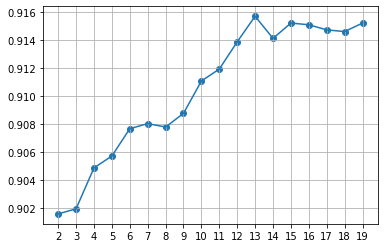

In [36]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

    13 clusters is the optimal k number.

In [39]:
knn = KNeighborsClassifier(n_neighbors=13, n_jobs=-1)
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)

In [206]:
print(classification_report(y_test, knn_preds))
print('AUC score',roc_auc_score(y_test, knn_preds))
print('Accuracy score',accuracy_score(y_test,knn_preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7324
           1       0.65      0.50      0.57       898

    accuracy                           0.92      8222
   macro avg       0.79      0.73      0.76      8222
weighted avg       0.91      0.92      0.91      8222

AUC score 0.7343194841622684
Accuracy score 0.9157139382145464


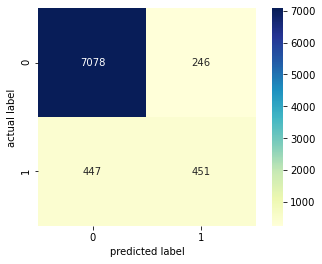

In [40]:
cm = confusion_matrix(y_test, knn_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

    With 13 clusters, the accuracy improved to 91%. As well as recall and precision. 

#### Bayes Naive model

In [42]:
bn = GaussianNB()
bn.fit(x_train, y_train)
bn_preds = bn.predict(x_test)

In [43]:
print(classification_report(y_test, bn_preds))
print('AUC score',roc_auc_score(y_test, bn_preds))
print('Accuracy score',accuracy_score(y_test,bn_preds))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90      7324
           1       0.36      0.61      0.45       898

    accuracy                           0.84      8222
   macro avg       0.65      0.74      0.68      8222
weighted avg       0.88      0.84      0.86      8222

AUC score 0.7389914051372125
Accuracy score 0.8378739965945026


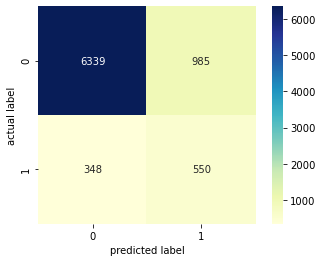

In [44]:
cm = confusion_matrix(y_test, bn_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

    Bayes Naive model performs well, but not better than KNN. 

#### Decision Tree

In [46]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_preds = dt.predict(x_test)

In [47]:
print(classification_report(y_test, dt_preds))
print('AUC score',roc_auc_score(y_test, dt_preds))
print('Accuracy score',accuracy_score(y_test,dt_preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7324
           1       0.50      0.51      0.50       898

    accuracy                           0.89      8222
   macro avg       0.72      0.72      0.72      8222
weighted avg       0.89      0.89      0.89      8222

AUC score 0.7241749673709037
Accuracy score 0.8898078326441256


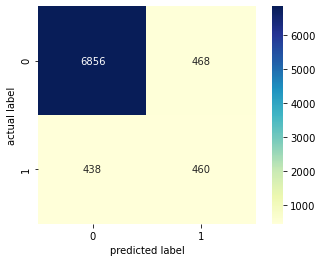

In [48]:
cm = confusion_matrix(y_test, dt_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

    Overall, decision tree model perform better than Naive Bayes model but still KNN is the best so far

#### Logistic Regression

In [50]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
lg_preds = lg.predict(x_test)

In [53]:
print(classification_report(y_test, lg_preds))
print('AUC score',roc_auc_score(y_test, lg_preds))
print('Accuracy score',accuracy_score(y_test,lg_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7324
           1       0.64      0.39      0.48       898

    accuracy                           0.91      8222
   macro avg       0.79      0.68      0.72      8222
weighted avg       0.90      0.91      0.90      8222

AUC score 0.6810083150979359
Accuracy score 0.9095110678666991


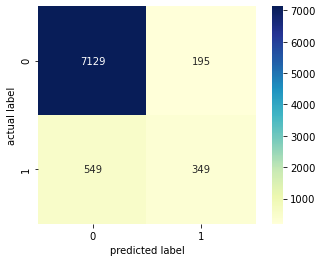

In [52]:
cm = confusion_matrix(y_test, lg_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

    Logistic Regression perform very well and so close to KNN. 
    
    So far out model performance is:
    
    1- KNN: Accuracy = 91% , F1 score = 0.91
    2- Logistic Regression: Accuracy = 90% , F1 score = 0.90
    3- Decision Tree: Accuracy =  88% , F1 score = 0.89
    4: Naive Bayes: Accuracy = 83% , F1 score = 0.86
    

##### Ploting ROC Curve for KNN model: 

In [54]:
lr_proba = cross_val_predict(knn, x_train, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [55]:
def ROC_Curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Portuguese banking institution): 0.91 


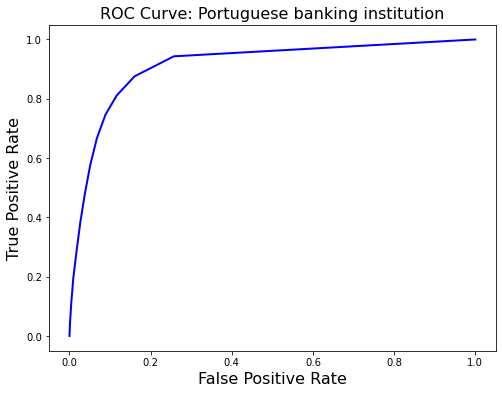

In [56]:
ROC_Curve('Portuguese banking institution',y_train,lr_scores)

### References 

https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

https://www.w3schools.com/python/ref_func_round.asp

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/